In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd

from utils import make_dataset, train_loop, eval_loop, plot_training_history

## Make data, split in train-val-test and trasform into Datasets and DataLoaders

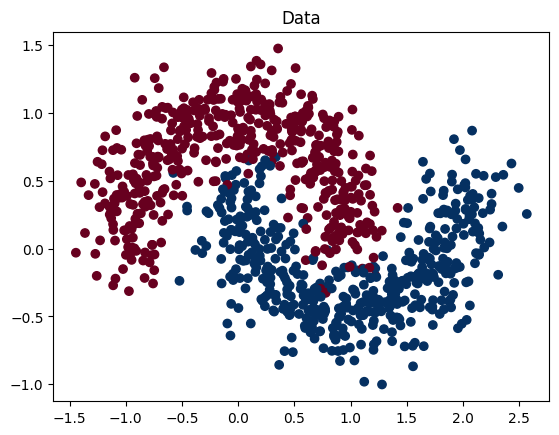

In [2]:
# Generate synthetic data, dataset and dataloader
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.title("Data")
plt.show()

In [3]:
# ------------- define and transform data into dataset------------
# split dataset into train, val and test sets and define dataloaders
# (alt crate train|val|test split of data, transform each into a dataset and define dataloaders)

dataset = make_dataset(X, y)

dataset_trainval, dataset_test = train_test_split(dataset, test_size=0.3, random_state=42)
dataset_train, dataset_val = train_test_split(dataset_trainval, test_size=0.2, random_state=42)

train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset_val, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False, num_workers=4)

In [4]:
print(len(dataset_train), len(dataset_val), len(dataset_test)) # number of train, val, test samples
print(len(train_loader.dataset), len(val_loader.dataset), len(test_loader.dataset)) # number of train, val, test samples
print(len(train_loader), len(val_loader), len(test_loader)) # number of train, val, test batches with batch_size defined in DataLoaders

560 140 300
560 140 300
9 3 5


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [5]:
# --------- model with different activation functions----------
class MyModel(nn.Module):
    def __init__(self, activation_function):
        super().__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.act_hidden = activation_function
        self.output = nn.Linear(10, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act_hidden(self.hidden1(x))
        x = self.act_output(self.output(x))
        return x

## Train and evaluate for single combo of activationa and loss function
'relu' and binary crossentropy

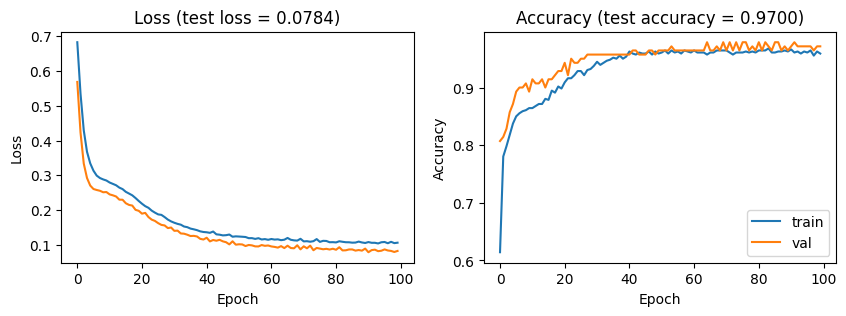

In [9]:
# see utils for train_loop(), eval_loop(), plot_training-history()
loss_fn = nn.BCELoss() # binary crossentropy
activation_function = nn.ReLU()
model= MyModel(activation_function)
optimizer = Adam(model.parameters(), lr=0.02)
epochs = 100

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loop
for epoch in range(epochs):
      train_loss, train_accuracy = train_loop(dataloader=train_loader, model=model, loss_fn=loss_fn, optimizer=optimizer) # train loop with train loader
      train_losses.append(train_loss)
      train_accuracies.append(train_accuracy)
 
      val_loss, val_accuracy = eval_loop(dataloader=val_loader, model=model, loss_fn=loss_fn) # test loop with validation loader
      val_losses.append(val_loss)
      val_accuracies.append(val_accuracy)

# Test loop
test_loss, test_accuracy = eval_loop(dataloader=test_loader, model=model, loss_fn=loss_fn) 

# visualize data
plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies, test_accuracy, test_loss)

## Experimentation with several activation functions and loss functions

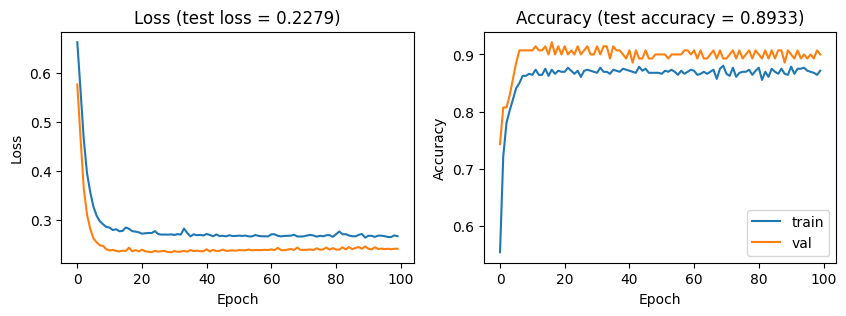

ReLU(), BCELoss(): Test Loss = 0.2279, Test Accuracy = 0.8933


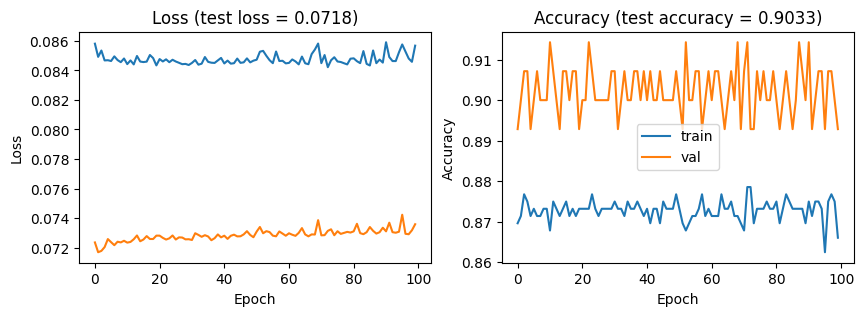

ReLU(), MSELoss(): Test Loss = 0.0718, Test Accuracy = 0.9033


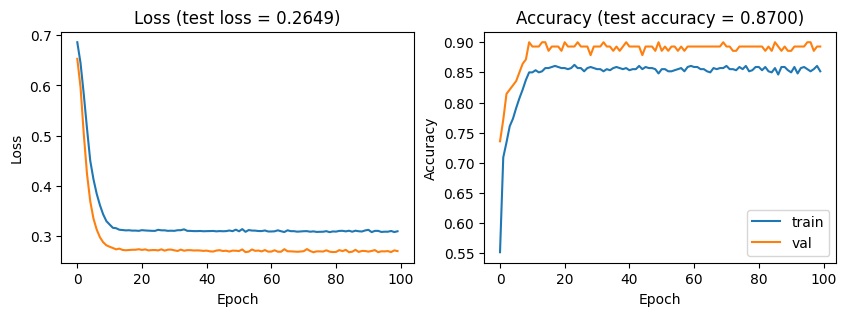

Sigmoid(), BCELoss(): Test Loss = 0.2649, Test Accuracy = 0.8700


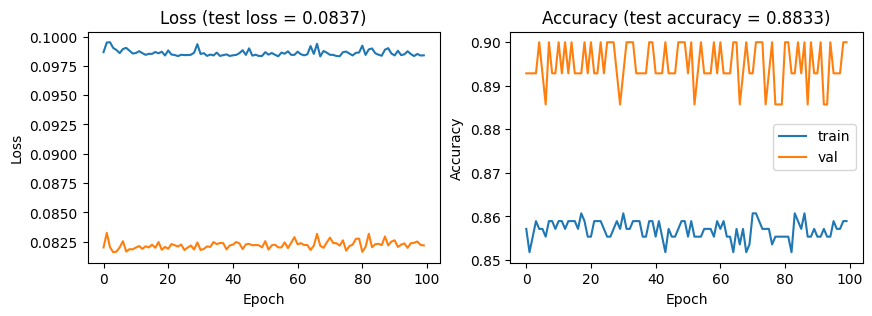

Sigmoid(), MSELoss(): Test Loss = 0.0837, Test Accuracy = 0.8833


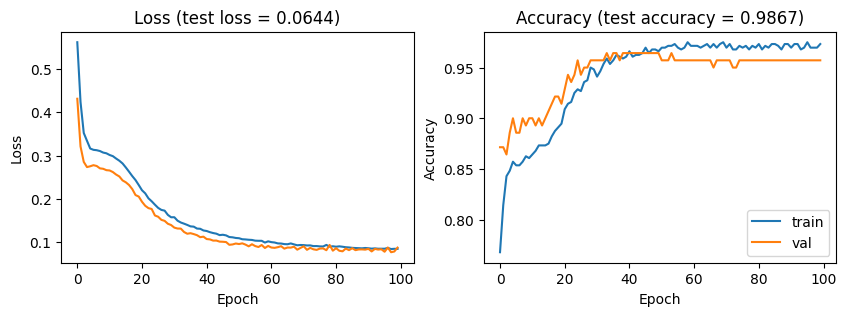

Tanh(), BCELoss(): Test Loss = 0.0644, Test Accuracy = 0.9867


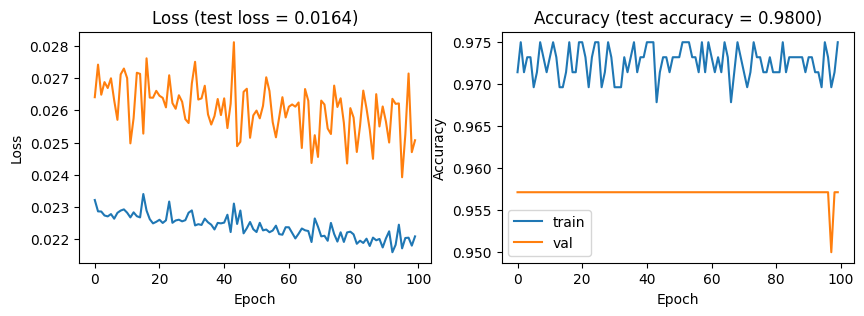

Tanh(), MSELoss(): Test Loss = 0.0164, Test Accuracy = 0.9800

Summary Table:
  Activation Function Loss Function  Test Loss  Test Accuracy
0              ReLU()     BCELoss()   0.227896       0.893333
1              ReLU()     MSELoss()   0.071821       0.903333
2           Sigmoid()     BCELoss()   0.264887       0.870000
3           Sigmoid()     MSELoss()   0.083749       0.883333
4              Tanh()     BCELoss()   0.064388       0.986667
5              Tanh()     MSELoss()   0.016431       0.980000


In [10]:
epochs = 100

activation_functions = [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]
loss_functions = [nn.BCELoss(), nn.MSELoss()] #binaly cross entropy, mse

results_list = []

for activation_function in activation_functions:
    model = MyModel(activation_function=activation_function)
    optimizer = Adam(model.parameters(), lr=0.02)
    for loss_function in loss_functions:
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        # Training and validation loop
        for epoch in range(epochs):
            train_loss, train_accuracy = train_loop(dataloader=train_loader, model=model, loss_fn=loss_function, optimizer=optimizer)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
        
            val_loss, val_accuracy = eval_loop(dataloader=val_loader, model=model, loss_fn=loss_function)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

        # Test loop
        test_loss, test_accuracy = eval_loop(dataloader=test_loader, model=model, loss_fn=loss_function) 

        # visualize data
        plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies, test_accuracy, test_loss)
            
        # Append the results to the list
        results_list.append({
            'Activation Function': activation_function,
            'Loss Function': loss_function,
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy
        })

        print(f'{activation_function}, {loss_function}: Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}')

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Print the summarized table
print("\nSummary Table:")
print(results_df)


# Conclusion
MSE not suitable for binary classification (good for regression). ReLU and Sigmoid converge the fastest even if not the best accuracy.


---